In [5]:
#importing libearies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor

In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
#loading data 
df=pd.read_csv("/config/workspace/insurance.csv")

In [9]:
#top 5 records 
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [10]:
#bottom 5 records 
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [11]:
df.sample(5)

,age,sex,bmi,children,smoker,region,expenses
1048,25,female,22.5,1,no,northwest,3594.17
1135,50,female,28.1,3,no,northwest,11085.59
379,62,male,31.5,1,no,southeast,27000.98
85,45,male,22.9,2,yes,northwest,21098.55
637,35,female,38.1,2,no,northeast,24915.05


In [12]:
df.shape

(1338, 7)

In [13]:
#Numeric Features :
Numeric_Features=[col for col in df.columns if df[col].dtypes!='O']
Numeric_Features

['age', 'bmi', 'children', 'expenses']

In [14]:
#Categorical  Features :
Categorical_Features=[col for col in df.columns if df[col].dtypes=='O']
Categorical_Features

['sex', 'smoker', 'region']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.665471,6.098382,16.0,26.3,30.4,34.7,53.1
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expenses,1338.0,NaN,NaN,NaN,13270.422414,12110.01124,1121.87,4740.2875,9382.03,16639.915,63770.43


In [17]:
#finding any duplicates inside dataset
df.duplicated().sum()
#it has 1 duplicate record drop it 
df.drop_duplicates(inplace=True)

In [18]:
#finding any null inside dataset 
df.isna().sum()
#We dont have null values inside dataset 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

EXPLORATORY DATA ANALYSIS :

Text(0.5, 1.0, 'Cardinality')

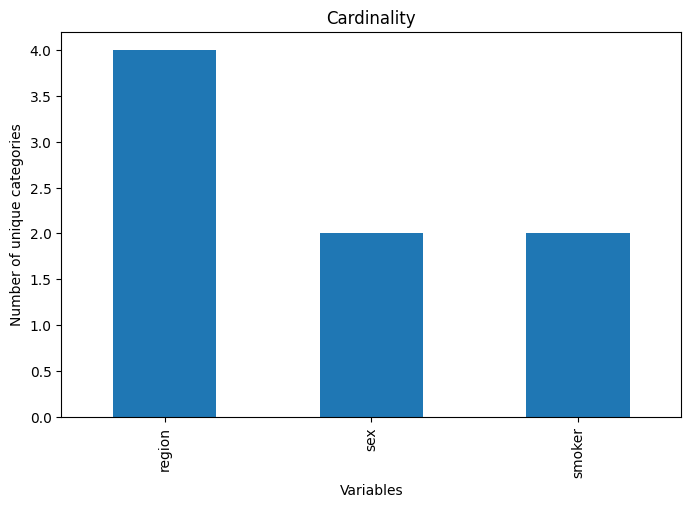

In [19]:
#Finding the cardinality of categorical Features inside dataframe
df[['sex','smoker','region']].nunique().sort_values(ascending=False).plot.bar(figsize=(8,5))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

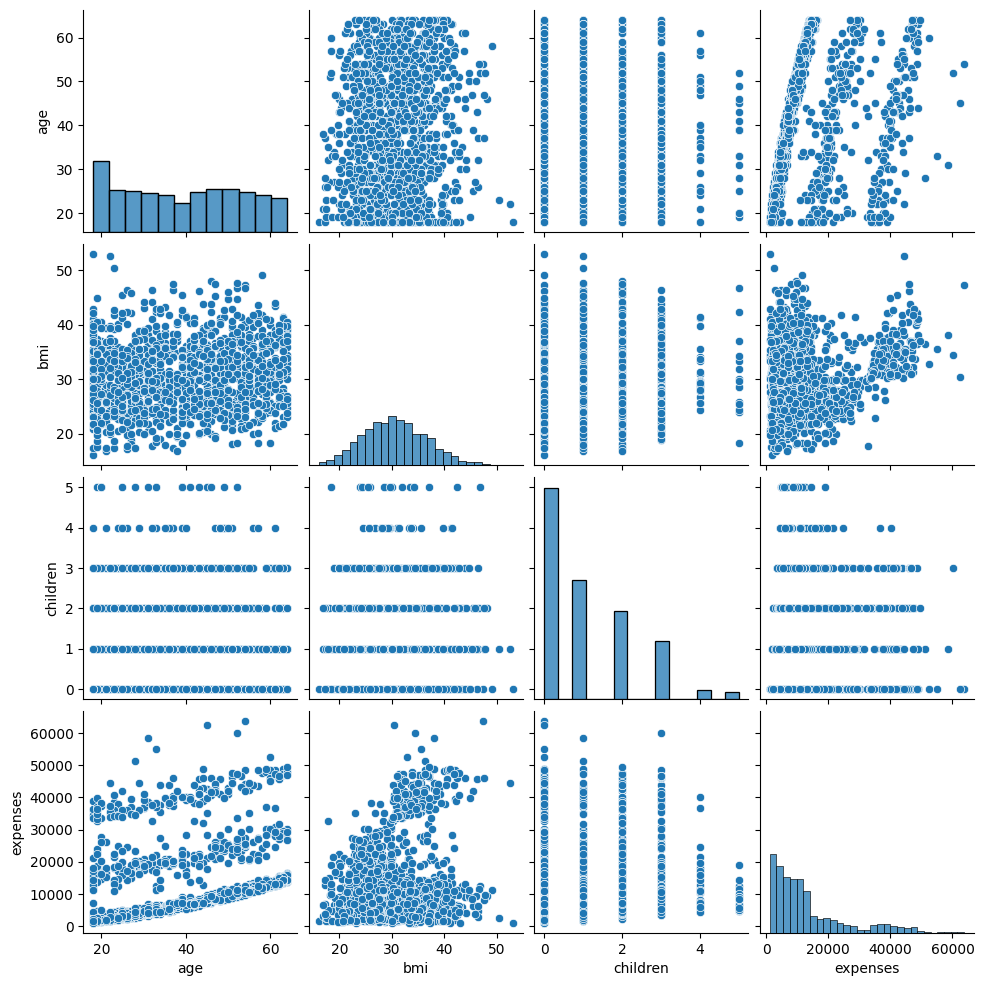

In [20]:
#distribution of all features 
sns.pairplot(df)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'expenses'}>]], dtype=object)

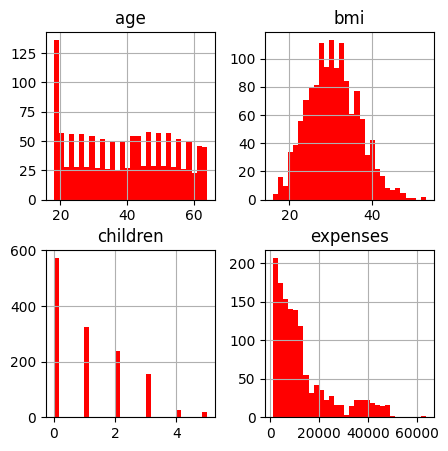

In [21]:
df[['age','bmi','children','expenses']].hist(bins=30,figsize=(5,5),color='red')

<Axes: >

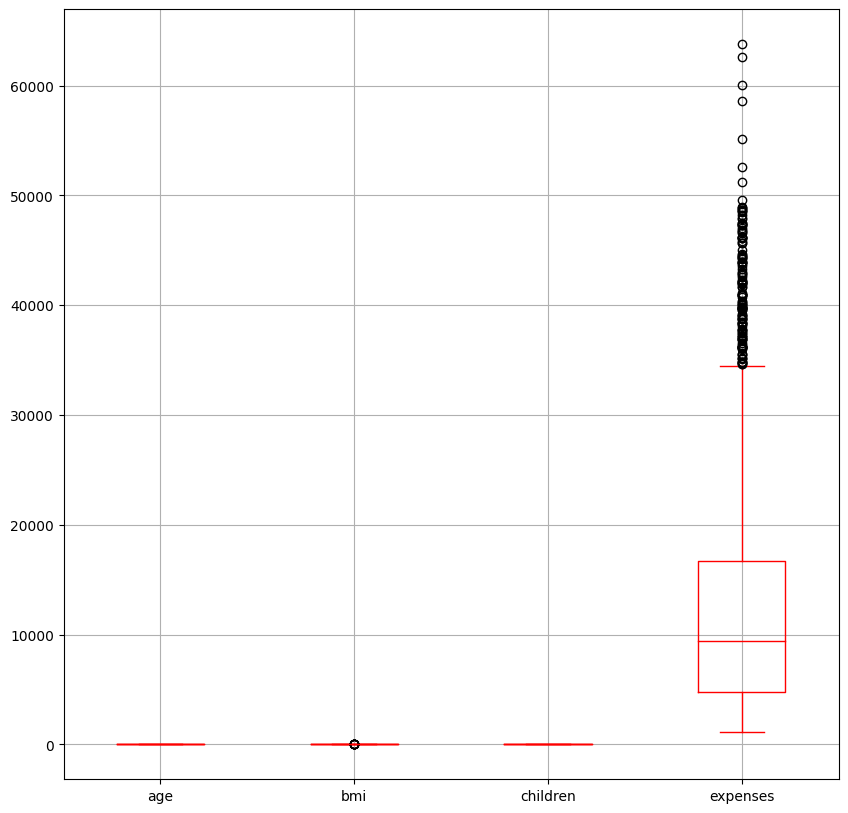

In [22]:
df[['age','bmi','children','expenses']].boxplot(figsize=(10,10),color='red')

<Axes: xlabel='expenses', ylabel='Density'>

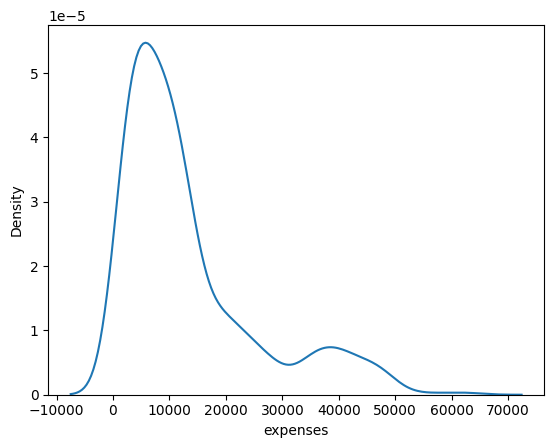

In [23]:
#let see the distribution of our target feature expenses 
sns.kdeplot(df['expenses'])
#we can see data is not normaly distributed

<Axes: xlabel='expenses', ylabel='Density'>

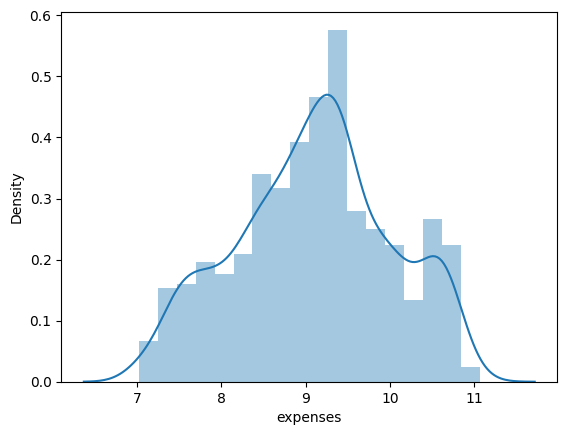

In [24]:
sns.distplot(np.log(df['expenses']))
#by applying log transformation on our target variable we can achieve normal distribution

 Lets do univariate analysis

<Axes: xlabel='age', ylabel='Density'>

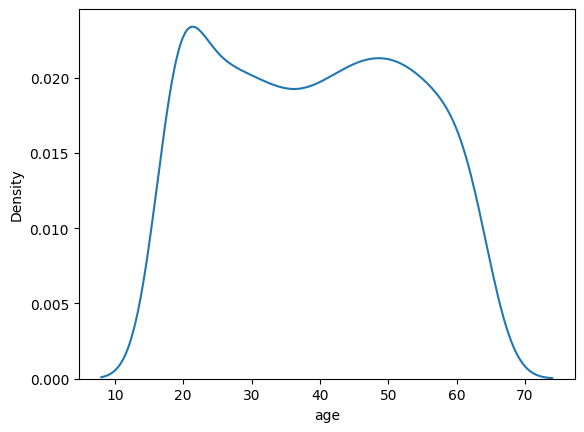

In [25]:
#let see the distribution of age 
sns.kdeplot(df['age'])
#Age is not normely distributed

<Axes: xlabel='bmi', ylabel='Density'>

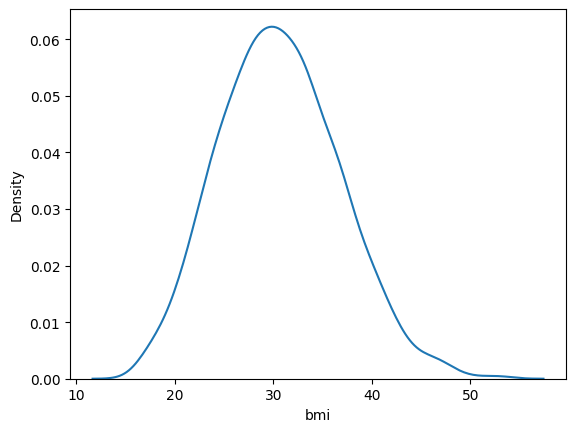

In [26]:
#let see the distribution of bmi
sns.kdeplot(df['bmi'])
#bmi is normely distributed

<Axes: xlabel='children', ylabel='Density'>

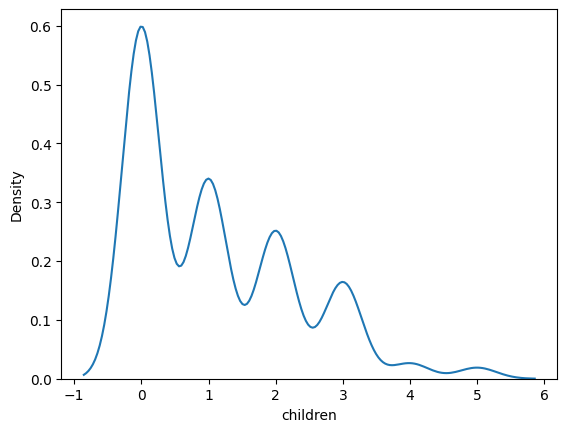

In [27]:
#let see the distribution of  childen  
sns.kdeplot(df['children'])
#children is not normely distributed

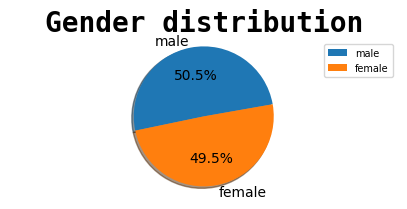

In [29]:


# Creating a pie chart for 'Gender status'
Gender = df['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(5, 2))
plt.pie(Gender.values, labels=Gender.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Gender distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()



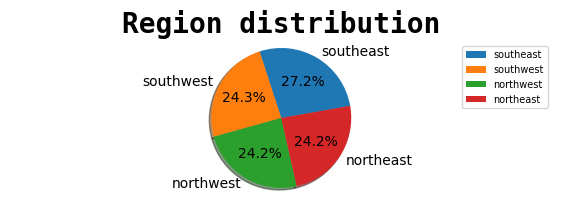

In [30]:
# Creating a pie chart for 'Region status'
Region = df['region'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 2))
plt.pie(Region.values, labels=Region.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Region distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

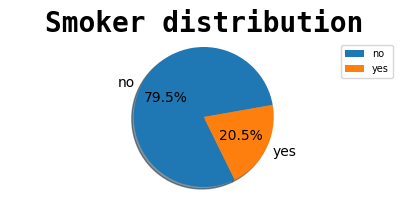

In [31]:
# Creating a pie chart for 'Region status'
Smoker = df['smoker'].value_counts()

plt.style.use('default')
plt.figure(figsize=(5, 2))
plt.pie(Smoker.values, labels=Smoker.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Smoker distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

Lets do bivariate and multivariate analysis

Text(0.5, 1.0, 'Age vs Expenses')

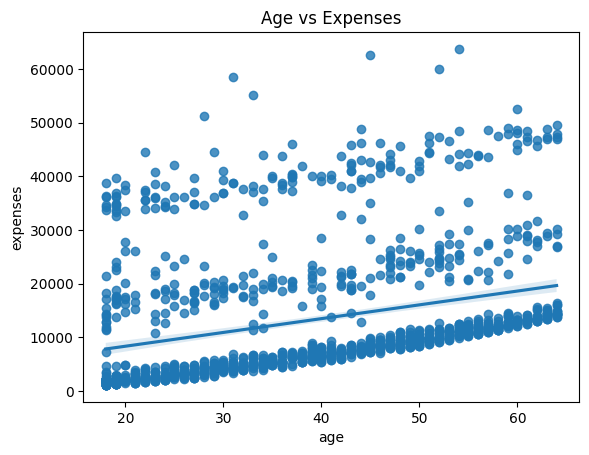

In [32]:
sns.regplot(x='age',y='expenses',data=df)
plt.title('Age vs Expenses')

Text(0.5, 1.0, 'BMI vs Expenses')

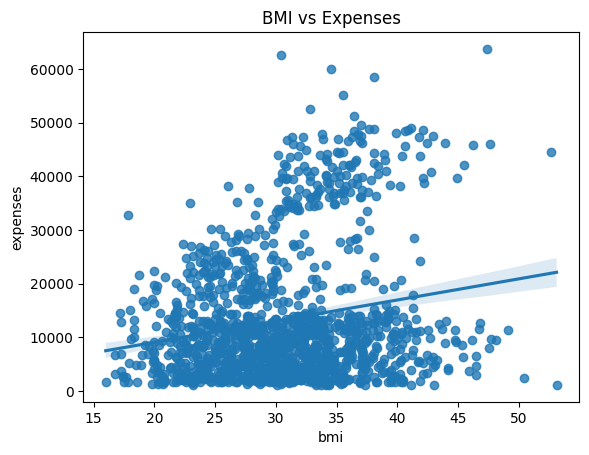

In [33]:
#PLotting relation between bmi vs expenses
sns.regplot(x='bmi',y='expenses',data=df)
plt.title('BMI vs Expenses')

Correlation Matrix:

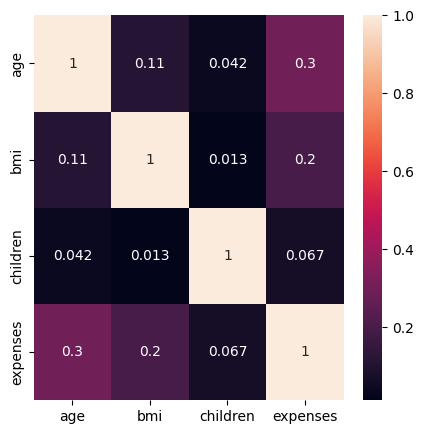

In [34]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Feature Engineering 

In [35]:
#Splitting data into train test split 
X=df.drop('expenses',axis=1)
X.shape

(1337, 6)

In [36]:
y=np.log(df['expenses'])
y.shape

(1337,)

In [37]:
y

0        9.734176
1        7.453301
2        8.400538
3        9.998092
4        8.260198
          ...    
1333     9.268661
1334     7.698927
1335     7.396231
1336     7.604870
1337    10.279914
Name: expenses, Length: 1337, dtype: float64

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64

In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 6)
(268, 6)
(1069,)
(268,)


In [153]:
[col for col in X if X[col].dtype!='O']

['age', 'bmi', 'children']

In [154]:
cat_features=['sex', 'smoker', 'region']
num_features=['age', 'bmi', 'children']

Experiment No1: using RobustScaler

In [105]:
#Since we have some categorical features in our dataset we have to encode them 
#we have some numerical features we have to transform it into one scale 

'''
 USING LINEAR REGRESSION
'''
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])
step2=LinearRegression()
pipe=Pipeline([('preprocessor1',preprocessor1),
               ('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",mean_squared_error(y_test,y_pred))

R2 score 0.7622540367051422
MAE 0.2955155115992649
RMSE 0.21284245173850194


In [106]:
'''
 USING RIDGE REGRESSION
'''
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])
step2=Ridge()
pipe=Pipeline([('preprocessor1',preprocessor1),
               ('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",mean_squared_error(y_test,y_pred))

R2 score 0.7622634466643208
MAE 0.29591826329652793
RMSE 0.21283402745758231


In [107]:
'''
 USING LASSO REGRESSION
'''
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])
step2=Lasso(alpha=0.01)
pipe=Pipeline([('preprocessor1',preprocessor1),
               ('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",mean_squared_error(y_test,y_pred))

R2 score 0.7593206454100255
MAE 0.29502361176361686
RMSE 0.21546857496056776


In [108]:
'''USING DECISION TREE REGRESSOR '''
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])
step2=DecisionTreeRegressor()
pipe=Pipeline([('preprocessor1',preprocessor1),
               ('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",mean_squared_error(y_test,y_pred))

R2 score 0.6944585072596161
MAE 0.22564093959152928
RMSE 0.2735365072930835


In [109]:
'''USING XGB REGRESSOR '''
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])
step2=XGBRegressor()
pipe=Pipeline([('preprocessor1',preprocessor1),
               ('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",mean_squared_error(y_test,y_pred))

[05:53:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.8328833610209894
MAE 0.1920074162717381
RMSE 0.1496114368195461


In [110]:
'''USING RANDOM FOREST TREE  REGRESSOR '''
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])
step2=RandomForestRegressor()
pipe=Pipeline([('preprocessor1',preprocessor1),
               ('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",mean_squared_error(y_test,y_pred))

R2 score 0.8107303097031016
MAE 0.2000378023732763
RMSE 0.16944399124294254


In [111]:
'''USING ADABOOST  REGRESSOR '''
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])
step2=AdaBoostRegressor()
pipe=Pipeline([('preprocessor1',preprocessor1),
               ('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",mean_squared_error(y_test,y_pred))

R2 score 0.7069099086651276
MAE 0.3847830636393025
RMSE 0.2623893703827399


In [171]:
'''USING Gradient Boosting   REGRESSOR '''
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])
step2=GradientBoostingRegressor()
pipe=Pipeline([('preprocessor1',preprocessor1),
               ('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",mean_squared_error(y_test,y_pred))

R2 score 0.8285943044759498
MAE 0.1920278198723119
RMSE 0.15345122151258458


In [215]:
'''USING SVR '''
'''USING Gradient Boosting   REGRESSOR '''
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])
step2=SVR()
pipe=Pipeline([('preprocessor1',preprocessor1),
               ('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",mean_squared_error(y_test,y_pred))

R2 score 0.8265863163504219
MAE 0.17501800500249395
RMSE 0.15524887607536297


In [112]:
'''USING KnearestNeighbours REGRESSOR '''
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])
step2=KNeighborsRegressor()
pipe=Pipeline([('preprocessor1',preprocessor1),
               ('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",mean_squared_error(y_test,y_pred))

R2 score 0.7723662187826639
MAE 0.2775619126955385
RMSE 0.20378950465171372


Conclusion : From overall observation it is clear for our dataset XGB Regressor is peroforming best 

HyperparameterTuning 

In [143]:
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])
pipe=Pipeline([('preprocessor1',preprocessor1)])

X_train_scaled=pipe.fit_transform(X_train)
X_test_scaled=pipe.transform(X_test)

In [144]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=step2,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [145]:
random_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[06:26:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [147]:
print(random_cv.best_estimator_)
print(random_cv.best_params_)
print(random_cv.best_score_)

XGBRegressor(max_depth=2)
{'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.1, 'booster': 'gbtree', 'base_score': 0.5}
-0.2122885637718063


In [193]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.01,.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6,],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.6],
              'colsample_bytree': [0.8],
              'n_estimators': [600]}

In [194]:
xgb1 = XGBRegressor()
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train_scaled,y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.01, 0.03, 0.05, 0.07],
                         'max_depth': [5, 6], 'min_child_weight': [4],
                         'n_estimators': [600], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.6]},
             verbose=True)

In [195]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8235645998550116
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 600, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.6}


Our Final MOdel is :

In [207]:
'''USING XGB REGRESSOR '''
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])
step2=XGBRegressor(colsample_bytree=0.8,learning_rate=0.01,max_depth=4, 
                  min_child_weight=4,n_estimators=600, nthread=4, 
                  objective='reg:linear',silent= 1,subsample=0.7)
pipe=Pipeline([('preprocessor1',preprocessor1),
               ('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",mean_squared_error(y_test,y_pred))

R2 score 0.8315000461455242
MAE 0.183896278490873
RMSE 0.15084985166175807


Lets predict result on some new data

In [208]:
data={
    'age':40,
    'sex':'female',
    'bmi':40.30,
    'children':4,
    'smoker':'yes',
    'region':'southeast'
}

In [209]:
df_test=pd.DataFrame(data,index=[0])
df_test

,age,sex,bmi,children,smoker,region
0,40,female,40.3,4,yes,southeast


In [218]:
np.exp(pipe.predict(df_test))[0]

33560.84789526825

Saving the model using joblib 

In [219]:
#now we will train our model for entire dataset not just for train and test dataset 
'''USING XGB REGRESSOR '''
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])
step2=XGBRegressor(colsample_bytree=0.8,learning_rate=0.01,max_depth=4, 
                  min_child_weight=4,n_estimators=600, nthread=4, 
                  objective='reg:linear',silent= 1,subsample=0.7)
pipe=Pipeline([('preprocessor1',preprocessor1),
               ('step2',step2)])
pipe.fit(X,y)

Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('step2',
                 XGBRegressor(colsample_bytree=0.8, learning_rate=0.01,
                              max_depth=4, min_child_weight=4, n_estimators=600,
                              nthread=4, silent=1, subsample=0.7))])

In [221]:
#Saving the model 
import joblib

In [222]:
joblib.dump(pipe,"final_model_pipeline")

['final_model_pipeline']

In [223]:
#For future purpose we have load that joblib object 
model=joblib.load('final_model_pipeline')

In [224]:
#lets predict using loaded model for new data 
df_test=pd.DataFrame(data,index=[0])
df_test

,age,sex,bmi,children,smoker,region
0,40,female,40.3,4,yes,southeast


In [226]:
np.exp(model.predict(df_test))

array([41956.562], dtype=float32)

Conclusion : Since this prediction is done on entire dataset it is more accurate 